In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fraud_dataSet/Fraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


**Let's Handle the Data Cleaning Part**

since we dont have missing values so woudln't be worry about, will be checking outliers and multicollinearity

In [ ]:
df.info() # data types looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Lets Check out and handle the categorical features
df = pd.get_dummies(df, columns =['type'], drop_first =True)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [ ]:
# Let's see how we can identify outliers and handle them with care , because outliers can be dengerious for ML model
# Will be checking with Z-Score values

num_columns = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
z_score = np.abs(stats.zscore(df[num_columns]))
df[(z_score < 3).all(axis=1)]

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0,True,False,False,False
6362614,743,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0,False,False,False,True
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,True


**Now Let's check Multi-collinearity as asked in the documentation**

In [ ]:
# Let's check multicollinearity with Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x = df[num_columns]
data_vif= pd.DataFrame()
data_vif['Feature'] = x.columns
data_vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(data_vif)

          Feature         VIF
0          amount    3.861988
1   oldbalanceOrg  464.011728
2  newbalanceOrig  465.356124
3  oldbalanceDest   70.452251
4  newbalanceDest   82.167173


###Now Lets try to Build our Model

**Random Forest** is good for this problem statement, bacuse fruad detection kind of problem statement we will be having high dimension of data and **RF** can handle with many features
*  Also it can handle Non-linear relations which is common in Fraud Detection kind of problem statement
*  Not much affected by outliers
*  Feature Importance can be estimated with **RF**

*Random Forest is an Ensemble model which build multiple decision trees and combine their predictions to control overfiting and improve accuracy*

----------------------------------------------------------------
**Steps will be following**
* Prepare the Data (Feauture selection)
* Encoding Categorical features
* Spliting the train data into 30:70 ration(70% will be using training and 30% will be for testing)
* Hyperparameters (more n_estimators normally provides better accuracy) though with this dataset model tarining can be time consuming
* Evaluation & Prediction





In [ ]:
# We will be using Random forest for now, but we can alter the algorithm as per business requirements
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

**Let's Try to build the Fraud Detection Model**

In [ ]:
# will be droping few of the not useful features
x = df.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis =1)
y = df['isFraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state = 1)


In [ ]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 1)
RF.fit(x_train, y_train)


RandomForestClassifier(random_state=1)

In [ ]:
y_pred = RF.predict(x_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.98      0.79      0.87      2468

    accuracy                           1.00   1908786
   macro avg       0.99      0.90      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906270      48]
 [    513    1955]]


In [ ]:
# Feature Selection
importance = RF.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance})
importance_df.sort_values(by = 'Importance', ascending = False)
print(importance_df.head(15))

          Feature  Importance
0            step    0.089496
1          amount    0.161479
2   oldbalanceOrg    0.257541
3  newbalanceOrig    0.035633
4  oldbalanceDest    0.072541
5  newbalanceDest    0.315964
6   type_CASH_OUT    0.023707
7      type_DEBIT    0.000051
8    type_PAYMENT    0.000675
9   type_TRANSFER    0.042913


ROC-AUC Score: 0.9951934354293684


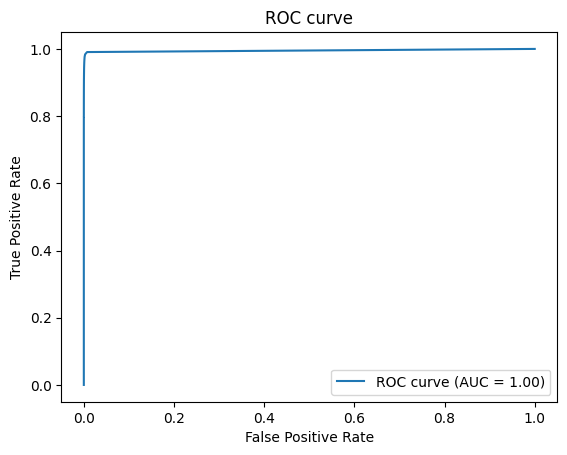

In [ ]:
# Let's try to check the model perfoemance and accuracy

from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test,RF.predict_proba(x_test)[:,1])
print(f'ROC-AUC Score: {roc_auc}')

fpr, tpr, _ = roc_curve(y_test, RF.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve")
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
print(importance_df.head(5))

          Feature  Importance
0            step    0.089496
1          amount    0.161479
2   oldbalanceOrg    0.257541
3  newbalanceOrig    0.035633
4  oldbalanceDest    0.072541
